## Fake New Detection

dataset url : https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection?resource=download&select=true.csv

Import required library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [2]:
fake = pd.read_csv('fake.csv')
real = pd.read_csv('true.csv')

In [3]:
fake.shape, real.shape

((23481, 4), (21417, 4))

In [4]:
fake.head(4)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"


In [5]:
real.head(4)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"


Create the label(varaible) to define the class of fake information as '0' otherwise '1'

In [6]:
fake['label'] = 0
real['label'] = 1

In [7]:
fake.columns, real.columns

(Index(['title', 'text', 'subject', 'date', 'label'], dtype='object'),
 Index(['title', 'text', 'subject', 'date', 'label'], dtype='object'))

#### Merging the two dataset(Fake, Real)

In [8]:
df = pd.concat([fake, real], axis=0, ignore_index=True)

In [9]:
df.shape

(44898, 5)

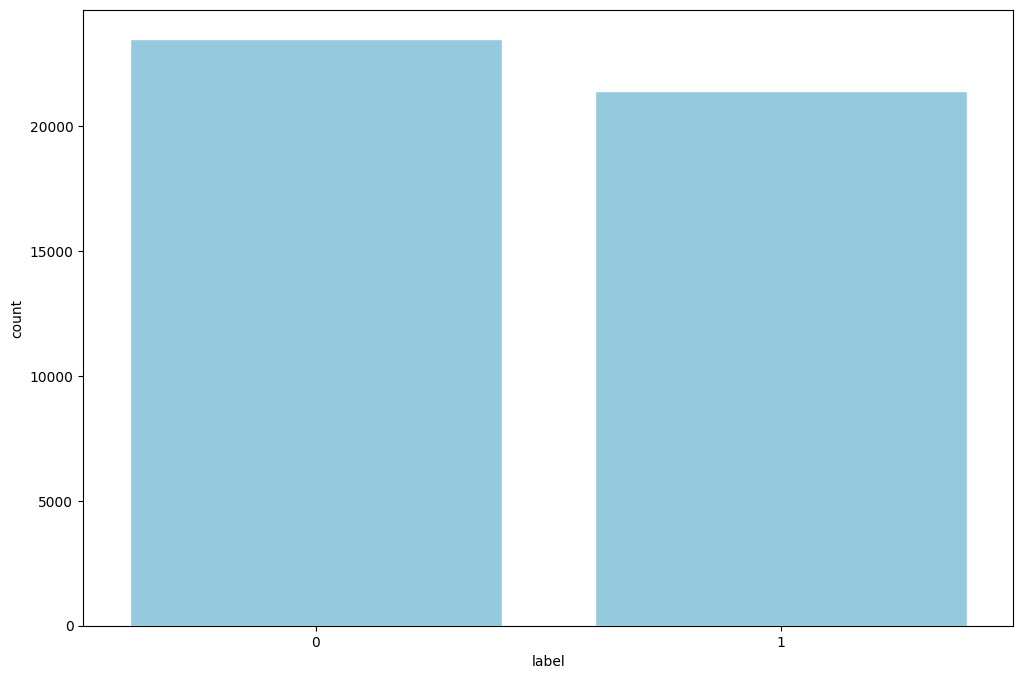

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x='label', data=df, color='skyblue', edgecolor='white')
plt.show()

In [11]:
# resample the labels (Randomly shuffle the dataset)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head(5)

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


#### Preprocessing the text data

In [12]:
# check the null values
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [13]:
# check the duplicates
df.duplicated().any() , df.duplicated().sum()

(np.True_, np.int64(209))

In [14]:
df.drop_duplicates(inplace=True)


In [15]:
df['text'].iloc[0:1]

0    21st Century Wire says Ben Stein, reputable pr...
Name: text, dtype: object

In [16]:
# clean the text data

def text_cleaning(text):
    text = text.lower()                            ## lowercase
    text = re.sub(r'\s+', ' ', text).strip()       ## additional sapces
    text = re.sub(r'https.\S+|www\S+', '',text)    ## remove links
    text = re.sub(r'@\w+', '', text)               ## remove mentions
    text = re.sub(r'#\w+','',text)                 ## remove hashtags
    text = re.sub(r'\s+([?.!,])', r'\1', text)     ## ## remove space before punctuation mark
    return text

In [17]:
df['text'] = df['text'].apply(text_cleaning)


In [18]:
# set the dependent and independent variables
X = df['text']
y = df['label']

In [19]:
X.shape, y.shape

((44689,), (44689,))

In [20]:
X.iloc[0:1]

0    21st century wire says ben stein, reputable pr...
Name: text, dtype: object

In [21]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Convert text to vectors

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)

### Modeling Fitting

In [23]:
from sklearn.metrics import accuracy_score,classification_report

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [26]:
pred_lr = LR.predict(xv_test)

In [27]:
LR.score(xv_test, y_test)

0.9864622958156187

In [28]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4652
           1       0.98      0.99      0.99      4286

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



### Decision Tree 

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)


DecisionTreeClassifier()

In [31]:
pred_dt = DT.predict(xv_test)

In [32]:
DT.score(xv_test, y_test)

0.9938464980980085

In [33]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4652
           1       0.99      0.99      0.99      4286

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



### Gradient Boosting Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
GBC = GradientBoostingClassifier()
GBC.fit(xv_train, y_train)


GradientBoostingClassifier()

In [36]:
pred_gbc = GBC.predict(xv_test)

In [37]:
GBC.score(xv_test, y_test)

0.9949653166256434

In [38]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4652
           1       0.99      1.00      0.99      4286

    accuracy                           0.99      8938
   macro avg       0.99      1.00      0.99      8938
weighted avg       0.99      0.99      0.99      8938



### Random Forest 

In [39]:
from sklearn.ensemble import RandomForestClassifier


In [40]:
RFC = RandomForestClassifier()
RFC.fit(xv_train, y_train)

RandomForestClassifier()

In [41]:
pred_rfc = RFC.predict(xv_test)

In [42]:
RFC.score(xv_test, y_test)

0.990713806220631

In [43]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4652
           1       0.99      0.99      0.99      4286

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



### Model Testing With Manual Entry

In [44]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(text_cleaning) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
# We’ve signed a $50 million deal with VET Airways in Cambodia for five NOEMI aircraft, bringing clean, go-anywhere air travel to Southeast Asia.
# “There’s a huge market for seaplanes in Asia,” says Neak Oknha Suo Vireak, CEO of Vireak Buntham Express CO.,LTD.  “NOEMI can fly straight from airports to the coast and outcompete road transport. We’re also looking into using it in our logistics network.”
# This marks our 52nd NOEMI ordered globally as demand for all-electric, amphibious flight takes off, from Denmark to Greece, Indonesia, Panama and now Cambodia.

In [52]:
news = str(input())
manual_testing(news)



LR Prediction: Not A Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Not A Fake News


In [53]:
import joblib
joblib.dump(vectorization,'vectorizer.jb')
joblib.dump(RFC,'RFC_model.jb') #select the random forest the classification
          


['RFC_model.jb']